### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [14]:
using LinearAlgebra,Statistics,Measures,DataFrames,CSV,Plots,Random

In [15]:
function test()
    open("time_test.csv", "w") do file
        write(file, "Size;Scalar_Time;Matrix_Time\n")
        for size = 100:300:1601
            for i = 1:11
                Random.seed!(size+i)
                x = rand(0:9, size)
                y = rand(0:9, size)
                m = rand(0:9, (size, size))
                c = rand(0:9, size) 

                scalar_time = @elapsed dot(x,y)
                matrix_time = @elapsed m * c

                if i > 1 
                    write(file, "$size;$scalar_time;$matrix_time\n")
                end
            end
        end
    end
end

test (generic function with 1 method)

In [16]:
test()

In [17]:
times = CSV.read("time_test.csv",delim=";",DataFrame)

Row,Size,Scalar_Time,Matrix_Time
,Int64,Float64,Float64
1,100,1.0e-7,2.4e-6
2,100,1.0e-7,2.6e-6
3,100,1.0e-7,2.4e-6
4,100,0.0,2.8e-6
5,100,0.0,2.5e-6
6,100,0.0,2.3e-6
7,100,0.0,2.5e-6
8,100,1.0e-7,2.5e-6
9,100,1.0e-7,2.5e-6


In [18]:
stats = combine(groupby(times,:Size),:Scalar_Time => mean => :Scalar_Mean, :Scalar_Time => std => :Scalar_Std, 
    :Matrix_Time => mean => :Matrix_Mean, :Matrix_Time => std => :Matrix_Std )

Row,Size,Scalar_Mean,Scalar_Std,Matrix_Mean,Matrix_Std
,Int64,Float64,Float64,Float64,Float64
1,100,5.0e-8,5.27046e-8,2.48e-6,1.47573e-7
2,400,5.6e-7,2.45855e-7,4.864e-5,9.02013e-6
3,700,1.21e-6,2.55821e-7,0.00028622,9.19113e-5
4,1000,1.64e-6,4.29987e-7,0.00069441,3.55954e-5
5,1300,2.17e-6,2.98329e-7,0.00100274,2.96753e-5
6,1600,2.49e-6,3.3483e-7,0.00141545,8.32023e-5


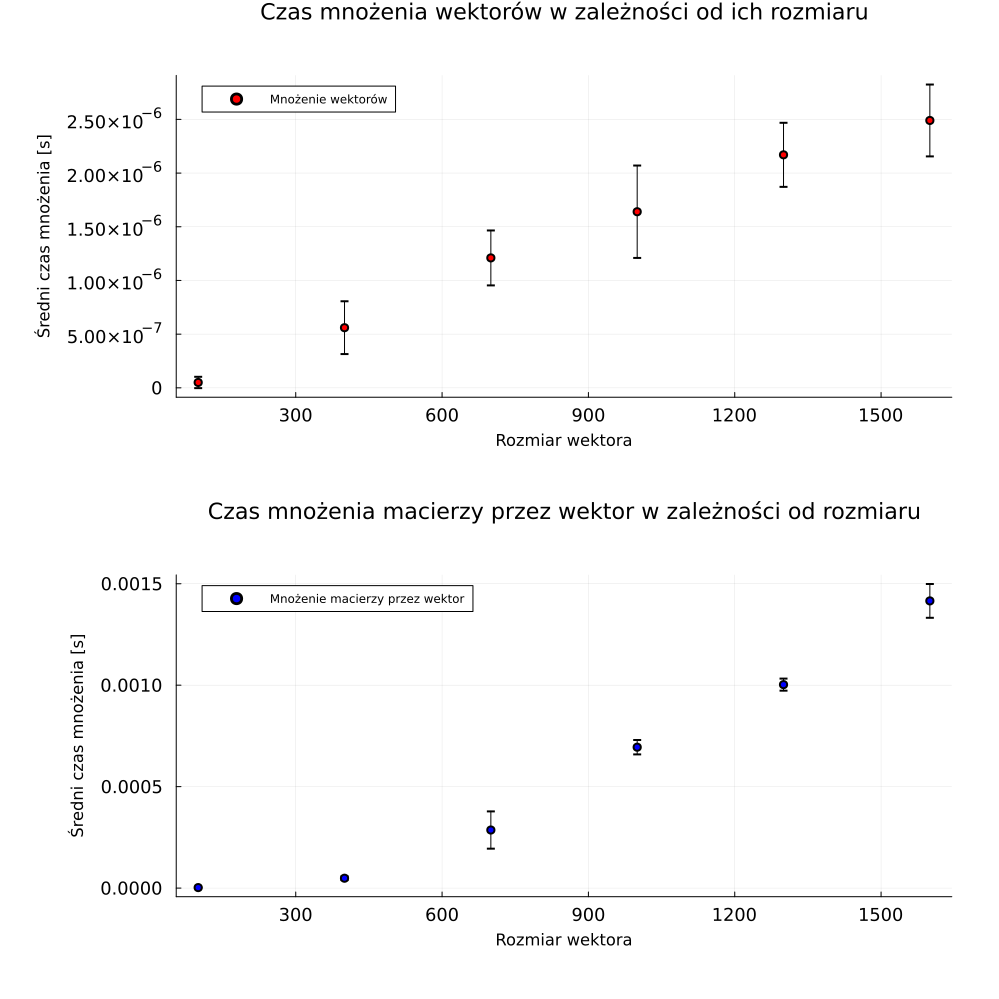

In [19]:
scatter(stats.Size, size = (1000, 1000), margin = 10mm, xtickfontsize=12, ytickfontsize=12, titlefontsize = 15,
    xlabel = "Rozmiar wektora", ylabel = "Średni czas mnożenia [s]", [stats.Scalar_Mean, stats.Matrix_Mean], 
    title = ["Czas mnożenia wektorów w zależności od ich rozmiaru" "Czas mnożenia macierzy przez wektor w zależności od rozmiaru"], 
    legend_position = :topleft, label = ["Mnożenie wektorów" "Mnożenie macierzy przez wektor"], 
    color = [:red :blue],yerr = [stats.Scalar_Std stats.Matrix_Std], layout = grid(2,1)
)